#### Importing Libraries

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py

#### Importing the data and reading it using Pandas 

In [388]:
data = pd.read_csv('wine_data.csv')

#### Viewing the data

In [389]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,6
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6


##### Checking for the missing Value

In [390]:
data.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Exploring the data

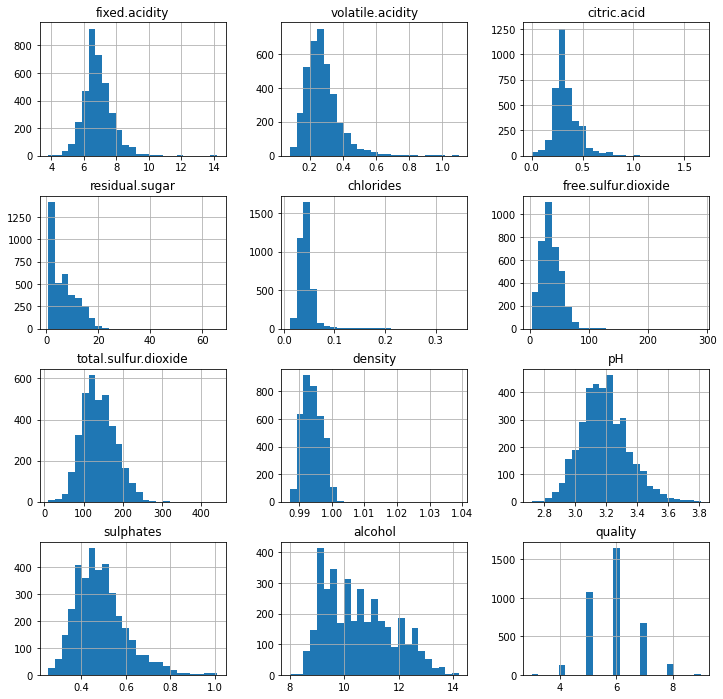

In [391]:
data.hist(bins=25, figsize=(12,12))
plt.show()

Text(0, 0.5, 'alcohol')

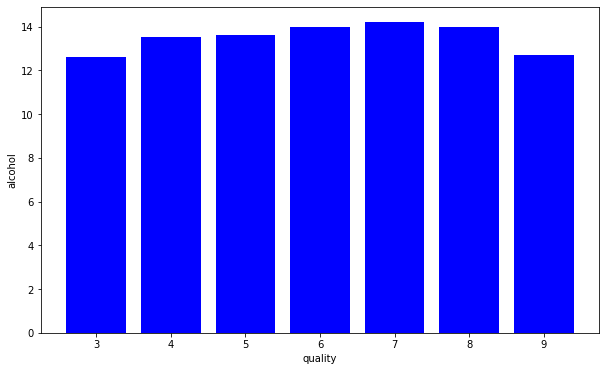

In [392]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='blue')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

In [393]:
py.histogram(x=data['quality'])

#### Finding the Correlation Matrix

In [394]:
correlation = data.corr()

In [395]:
correlation

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.007001,0.276717,0.095669,0.024912,-0.052866,0.103422,0.274080,-0.427455,-0.011698,-0.133657,-0.112055
volatile.acidity,-0.007001,1.000000,-0.128364,0.061389,0.072508,-0.086733,0.101651,0.027924,-0.033104,-0.004590,0.080353,-0.189077
citric.acid,0.276717,-0.128364,1.000000,0.099120,0.112020,0.091341,0.112926,0.147886,-0.154593,0.060196,-0.071094,-0.008268
residual.sugar,0.095669,0.061389,0.099120,1.000000,0.088412,0.293141,0.402443,0.836246,-0.200315,-0.035457,-0.450537,-0.089946
chlorides,0.024912,0.072508,0.112020,0.088412,1.000000,0.102240,0.200560,0.259024,-0.086252,0.017100,-0.361378,-0.211490
free.sulfur.dioxide,-0.052866,-0.086733,0.091341,0.293141,0.102240,1.000000,0.615961,0.283729,-0.003953,0.049423,-0.243806,0.007264
total.sulfur.dioxide,0.103422,0.101651,0.112926,0.402443,0.200560,0.615961,1.000000,0.530761,-0.001313,0.130214,-0.446622,-0.179859
density,0.274080,0.027924,0.147886,0.836246,0.259024,0.283729,0.530761,1.000000,-0.097556,0.074766,-0.779344,-0.306094
pH,-0.427455,-0.033104,-0.154593,-0.200315,-0.086252,-0.003953,-0.001313,-0.097556,1.000000,0.151368,0.127407,0.090143
sulphates,-0.011698,-0.004590,0.060196,-0.035457,0.017100,0.049423,0.130214,0.074766,0.151368,1.000000,-0.018640,0.035366


<AxesSubplot:>

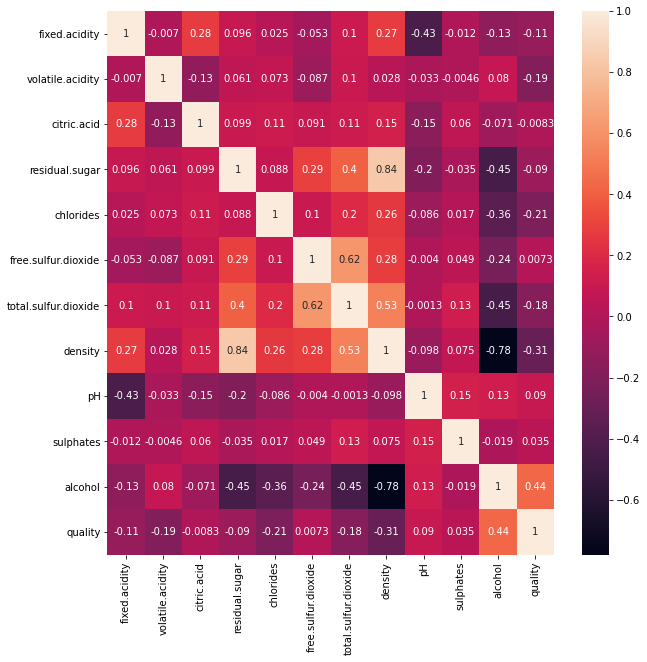

In [396]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)

#### Creating classification version of target variables

In [397]:
data['Good_Quality'] = [1 if x>7 else 0 for x in data['quality']]
data['Good_Quality']

0       0
1       0
2       1
3       0
4       0
       ..
3668    0
3669    0
3670    0
3671    0
3672    0
Name: Good_Quality, Length: 3673, dtype: int64

In [398]:
data['Good_Quality'].value_counts()

0    3526
1     147
Name: Good_Quality, dtype: int64

#### We find those features whose correlation number is high

In [399]:
#we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, 
#we find the feature 'total.sulfur.dioxide' which satisfy the condition.
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

density
alcohol


#### So we drop out the 'total.sulfur.dioxide' column which already satisfies the condition.

In [400]:
data=data.drop(['total.sulfur.dioxide'],axis=1)

In [401]:
data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Good_Quality
0,9.0,0.245,0.38,5.9,0.045,52.0,0.99500,2.93,0.35,10.2,6,0
1,8.2,0.420,0.29,4.1,0.030,31.0,0.99110,3.00,0.32,12.8,7,0
2,6.4,0.220,0.32,7.2,0.028,15.0,0.99300,3.13,0.55,10.9,8,1
3,5.0,0.350,0.25,7.8,0.031,24.0,0.99241,3.39,0.40,11.3,6,0
4,7.4,0.300,0.30,5.2,0.053,45.0,0.99410,3.12,0.45,10.3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,7.1,0.340,0.32,2.0,0.051,29.0,0.99354,3.30,0.50,10.4,6,0
3669,6.4,0.290,0.57,1.0,0.060,15.0,0.99240,3.06,0.41,9.5,5,0
3670,8.0,0.260,0.28,8.2,0.038,72.0,0.99566,3.12,0.56,10.0,6,0
3671,6.7,0.150,0.29,5.0,0.058,28.0,0.99460,3.52,0.44,10.2,7,0


#### Splitting into X, y

In [402]:
X = data.drop(['quality','Good_Quality'],axis=1)
y = data['Good_Quality']

#### Checking the proportion of the Good Quality

In [403]:
data['Good_Quality'].value_counts()

0    3526
1     147
Name: Good_Quality, dtype: int64

In [404]:
data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Good_Quality
0,9.0,0.245,0.38,5.9,0.045,52.0,0.99500,2.93,0.35,10.2,6,0
1,8.2,0.420,0.29,4.1,0.030,31.0,0.99110,3.00,0.32,12.8,7,0
2,6.4,0.220,0.32,7.2,0.028,15.0,0.99300,3.13,0.55,10.9,8,1
3,5.0,0.350,0.25,7.8,0.031,24.0,0.99241,3.39,0.40,11.3,6,0
4,7.4,0.300,0.30,5.2,0.053,45.0,0.99410,3.12,0.45,10.3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,7.1,0.340,0.32,2.0,0.051,29.0,0.99354,3.30,0.50,10.4,6,0
3669,6.4,0.290,0.57,1.0,0.060,15.0,0.99240,3.06,0.41,9.5,5,0
3670,8.0,0.260,0.28,8.2,0.038,72.0,0.99566,3.12,0.56,10.0,6,0
3671,6.7,0.150,0.29,5.0,0.058,28.0,0.99460,3.52,0.44,10.2,7,0


#### Preparing the Model

In [405]:
# Importing the modules
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Standardization

In [406]:
from sklearn.preprocessing import StandardScaler

X_features = X
X = StandardScaler().fit_transform(X)

### Decision Tree Algorithm

In [407]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

In [408]:
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [411]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       709
           1       0.35      0.42      0.39        26

    accuracy                           0.95       735
   macro avg       0.67      0.70      0.68       735
weighted avg       0.96      0.95      0.95       735



### Random Forest Algorithm

In [412]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()

In [413]:
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [414]:
y_pred_RF = model_RF.predict(X_test)

In [417]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       709
           1       1.00      0.27      0.42        26

    accuracy                           0.97       735
   macro avg       0.99      0.63      0.71       735
weighted avg       0.97      0.97      0.97       735



### AdaBoost

In [419]:
from sklearn.ensemble import AdaBoostClassifier
model_AD = AdaBoostClassifier()

model_AD.fit(X_train,y_train)
y_pred_AD = model_AD.predict(X_test)
print(classification_report(y_test,y_pred_AD))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       709
           1       0.25      0.08      0.12        26

    accuracy                           0.96       735
   macro avg       0.61      0.53      0.55       735
weighted avg       0.94      0.96      0.95       735



### Gradient Boosting 

In [421]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier()

model_GB.fit(X_train,y_train)

y_pred_GB = model_GB.predict(X_test)
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       709
           1       0.56      0.19      0.29        26

    accuracy                           0.97       735
   macro avg       0.76      0.59      0.63       735
weighted avg       0.96      0.97      0.96       735



### XGBoost

In [425]:
import xgboost as xgb
model_XGB = xgb.XGBClassifier()

model_XGB.fit(X_train,y_train)
y_pred_XGB = model_XGB.predict(X_test)

print(classification_report(y_test,y_pred))

c:\users\vicky\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       709
           1       0.35      0.42      0.39        26

    accuracy                           0.95       735
   macro avg       0.67      0.70      0.68       735
weighted avg       0.96      0.95      0.95       735



In [428]:
Good_Qulaity_data = data[data['Good_Quality']==1]
Good_Qulaity_data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Good_Quality
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,6.737415,0.282313,0.326871,5.935714,0.037442,36.482993,0.992378,3.214694,0.480000,11.621769,8.027211,1.0
std,0.836841,0.104045,0.085767,4.366627,0.012323,15.779453,0.002843,0.155327,0.135034,1.312924,0.163254,0.0
min,3.900000,0.120000,0.040000,0.800000,0.014000,6.000000,0.987130,2.940000,0.250000,8.500000,8.000000,1.0
25%,6.350000,0.210000,0.280000,2.100000,0.030000,27.500000,0.990355,3.115000,0.380000,11.000000,8.000000,1.0
50%,6.800000,0.260000,0.310000,4.600000,0.035000,35.000000,0.991750,3.220000,0.460000,12.000000,8.000000,1.0
75%,7.300000,0.335000,0.360000,8.625000,0.042000,45.000000,0.993510,3.315000,0.575000,12.600000,8.000000,1.0
max,9.100000,0.660000,0.740000,14.800000,0.121000,105.000000,1.000600,3.590000,0.950000,14.000000,9.000000,1.0


In [429]:
Bad_Qulaity_data = data[data['Good_Quality']==0]
Bad_Qulaity_data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Good_Quality
count,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.000000,3526.0
mean,6.859614,0.277771,0.335451,6.433537,0.046054,35.322036,0.994095,3.188798,0.489495,10.480014,5.804878,0.0
std,0.849240,0.099748,0.124468,5.080487,0.021986,17.023260,0.003004,0.152564,0.111397,1.219656,0.794620,0.0
min,3.800000,0.080000,0.000000,0.600000,0.012000,3.000000,0.987110,2.720000,0.260000,8.000000,3.000000,0.0
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,0.991800,3.080000,0.410000,9.400000,5.000000,0.0
50%,6.800000,0.260000,0.310000,5.300000,0.043000,34.000000,0.993880,3.180000,0.470000,10.300000,6.000000,0.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,0.996200,3.280000,0.540000,11.362500,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,1.038980,3.810000,1.010000,14.200000,7.000000,0.0
